<a href="https://colab.research.google.com/github/AlGhifaryAN/MachineLearningTasksTK44G4/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [4]:
# Define the path to your dataset in Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/EconomiesOfScale.csv'

# Use Pandas to read the CSV file
df = pd.read_csv(dataset_path)

# Now, you can work with your dataset using the 'df' DataFrame
print(df.head())

   Number of Units  Manufacturing Cost
0         1.000000           95.066056
1         1.185994           96.531750
2         1.191499           73.661311
3         1.204771           95.566843
4         1.298773           98.777013


In [5]:
# Replace 'your_dataset_path.csv' with the actual path to your dataset on Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/EconomiesOfScale.csv'
df = pd.read_csv(dataset_path)

# Assuming you have columns 'Number of Units' and 'Manufacturing Costs' in your dataset
x = df[['Number of Units']]
y = df['Manufacturing Cost']


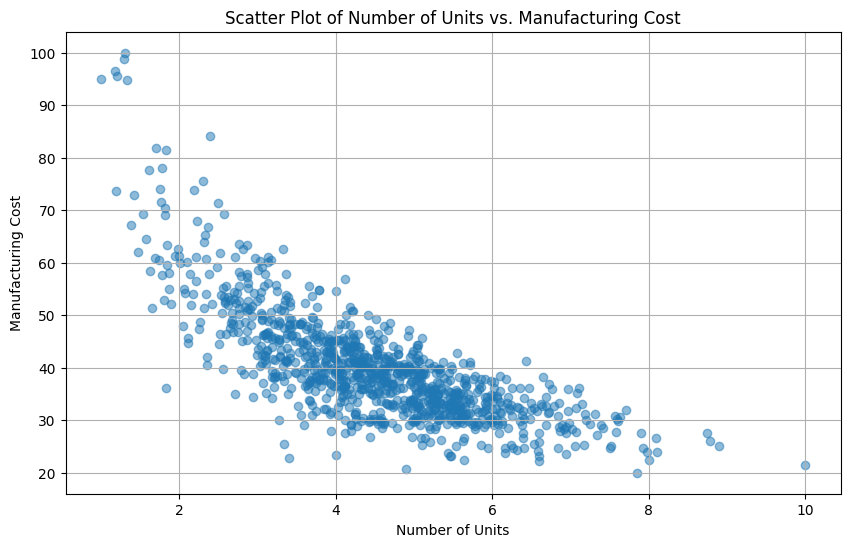

In [6]:
# Assuming you have a DataFrame called 'df' with columns 'Number of Units' and 'Manufacturing Cost'
# You can access these columns as df['Number of Units'] and df['Manufacturing Cost']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Number of Units'], df['Manufacturing Cost'], alpha=0.5)
plt.title('Scatter Plot of Number of Units vs. Manufacturing Cost')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.grid(True)
plt.show()


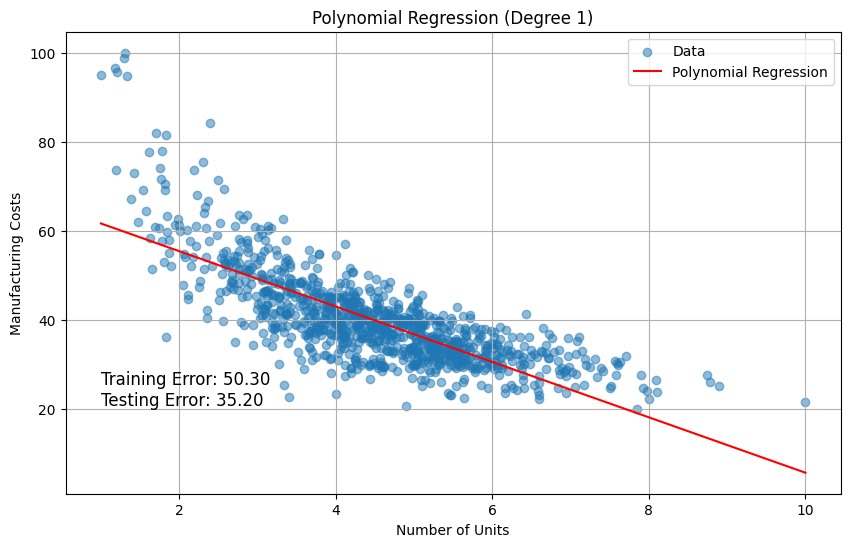

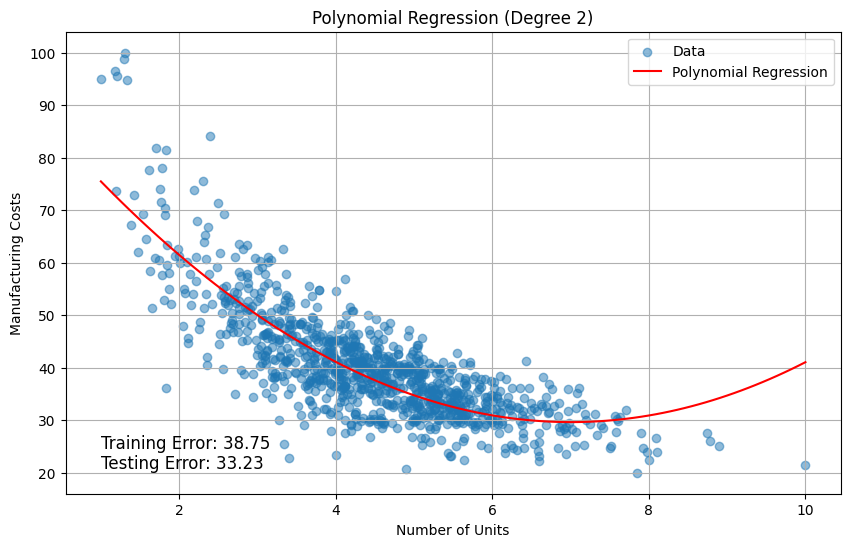

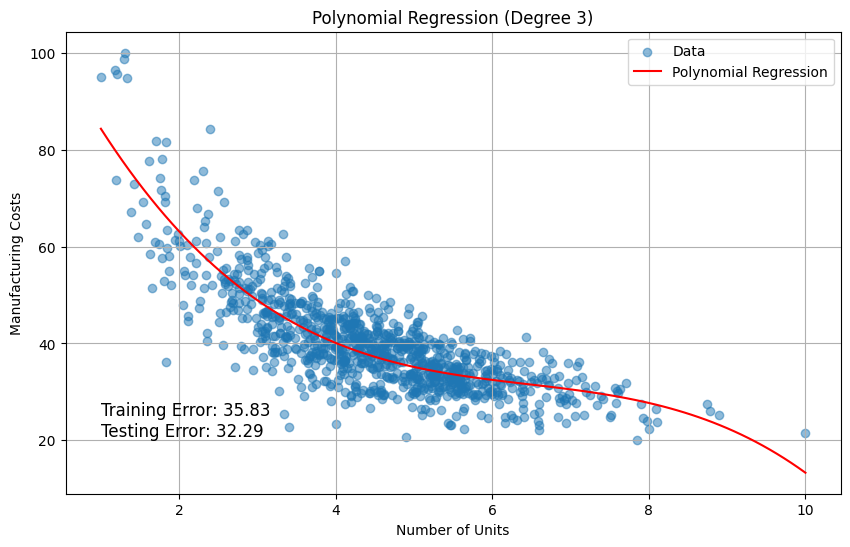

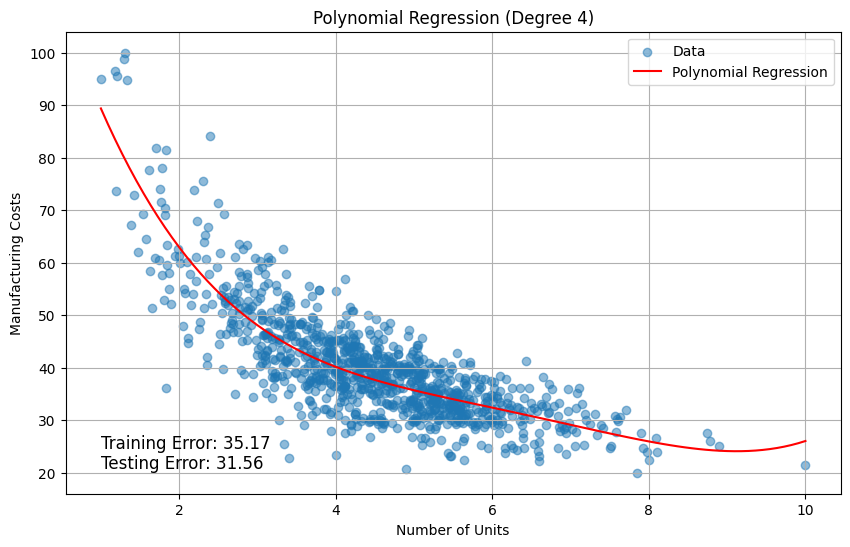

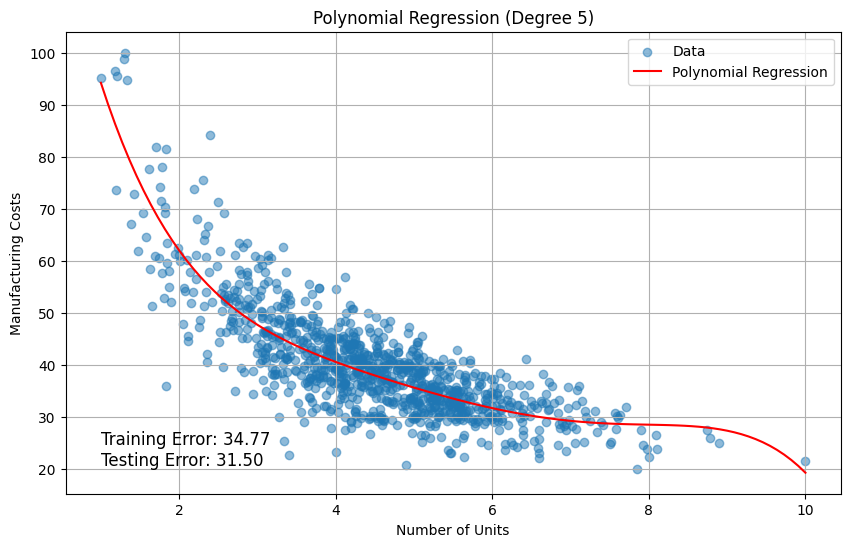

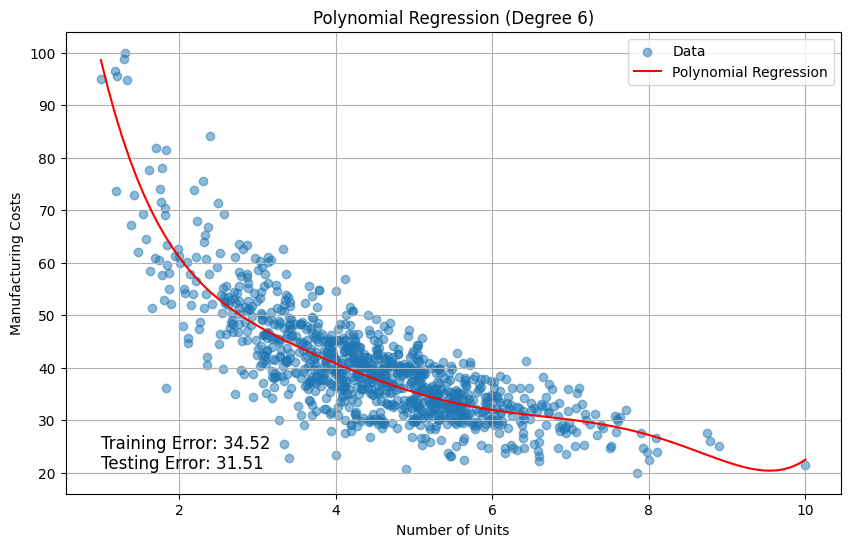

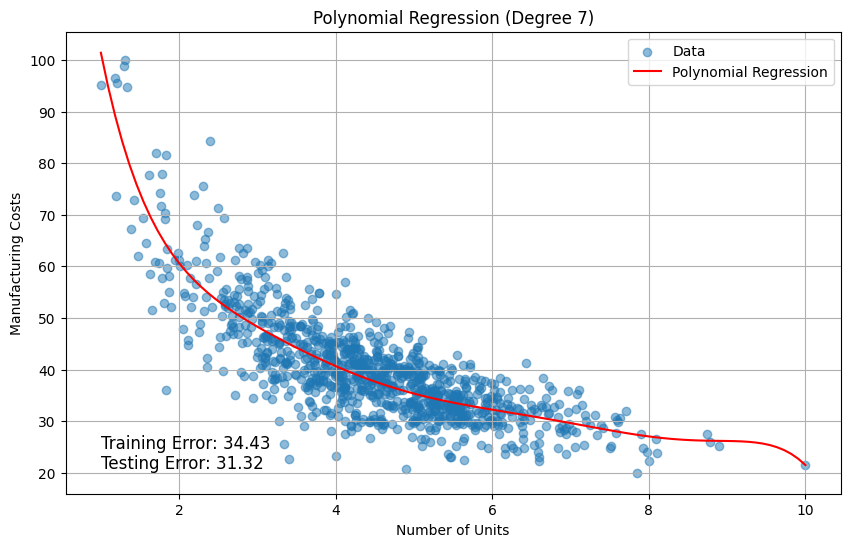

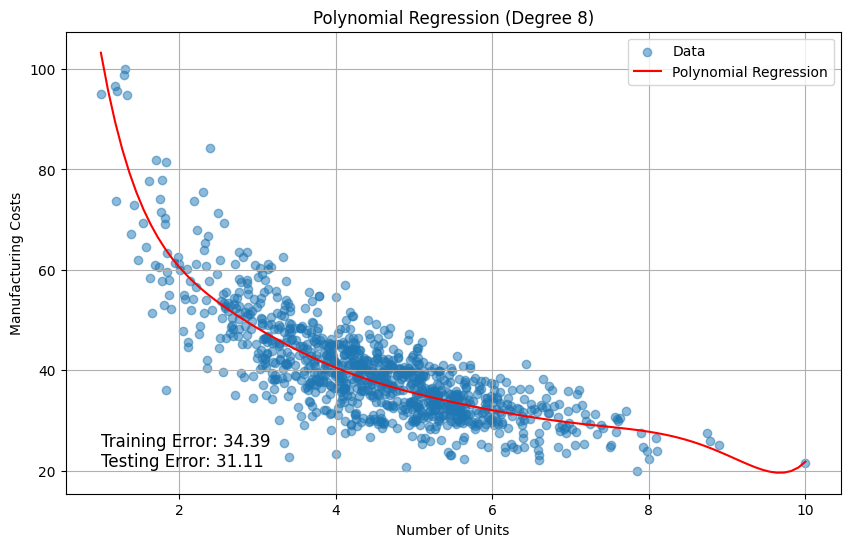

In [7]:
# Degree 1 to 8

# Assuming your DataFrame is named 'data' and contains columns 'Number of Units' and 'Manufacturing Cost'
X = df['Number of Units'].values.reshape(-1, 1)  # Independent variable (Number of Units)
y = df['Manufacturing Cost'].values  # Dependent variable (Manufacturing Cost)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define degrees for polynomial regression
degrees = np.arange(1, 9)

# Loop through each degree and create individual plots
for degree in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predictions
    train_pred = model.predict(X_poly_train)
    test_pred = model.predict(X_poly_test)

    # Calculate training and testing error
    train_error = mean_squared_error(y_train, train_pred)
    test_error = mean_squared_error(y_test, test_pred)

    # Create a new figure for each degree
    plt.figure(figsize=(10, 6))

    # Scatter plot of the data
    plt.scatter(X, y, alpha=0.5, label='Data')

    # Plot the regression curve
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_poly_range = poly.transform(X_range)
    y_pred_range = model.predict(X_poly_range)
    plt.plot(X_range, y_pred_range, color='red', label='Polynomial Regression')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Costs')
    plt.legend()
    plt.grid(True)

    # Display training and testing errors
    plt.text(X.min(), y.min(), f'Training Error: {train_error:.2f}\nTesting Error: {test_error:.2f}', fontsize=12, va='bottom')

    # Show the individual plot for this degree
    plt.show()